In [74]:
import pandas as pd 
import pandas_profiling
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np

## 1. Data Preprocessing and exploration

In [2]:
#read data
card_open_np = pd.read_csv('data/card_openings_non_participants.csv')
card_open = pd.read_csv('data/card_openings.csv')
features = pd.read_csv('data/features.csv')
twins = pd.read_csv('data/twins_base_202112121317.csv')
visa_com = pd.read_csv('data/visa_communications.csv')
visa_trans = pd.read_csv('data/visa_transactions.csv')
visa_trans_np = pd.read_csv('data/visa_transactions_non_particip.csv')

In [3]:
print('card_open_np shape: ', card_open_np.shape)
print('card_open shape: ', card_open.shape)
print('features shape: ', features.shape)
print('twins shape: ', twins.shape)
print('visa_com shape: ', visa_com.shape)
print('visa_trans shape: ', visa_trans.shape)
print('visa_trans_np shape: ', visa_trans_np.shape)

card_open_np shape:  (25589, 3)
card_open shape:  (22995, 3)
features shape:  (31418100, 7)
twins shape:  (866130, 2)
visa_com shape:  (1456826, 9)
visa_trans shape:  (396564, 4)
visa_trans_np shape:  (543494, 4)


In [5]:
card_open_np.head()

,cust_id,open_dt,contact_dt
0,00142a5cfe4dd6ac883e4dc0ba888d6266ce99257e0825...,2021-08-26,0
1,00b037b74b45a2a0c9dc64b59a2587dd79dabc93e1d84b...,2021-08-12,0
2,00d312b7591fdc7d5607feac6ebcff5223d2162bff5248...,2021-08-26,0
3,01965e567e31d90ae31b5476a7bdb44b76ebf0d3950cf4...,2021-08-04,0
4,02a874b8110d3a04c551a88d8e35529e2faf553d8512e5...,2021-08-04,0


In [6]:
card_open.head()

,cust_id,open_dt,contact_dt
0,2537ec14c2e5b8607ea67dfe09ec687205c59ed152407f...,2021-08-19,2021-08-12
1,b6bc9799397f07c8304673d4d51e7788a143ecb710452e...,2021-08-16,2021-08-13
2,d09ee17e668f229697a15a940915714b838826305e6973...,2021-08-21,2021-08-13
3,2323b4ae10e99e72160a74c5b42c38e47f2bc0692ef0a9...,2021-08-23,2021-08-13
4,b056b9822c2208a83eeb7150ee4be30d7088b07fed0ec5...,2021-08-23,2021-08-13


In [7]:
visa_com.head()

,channel_type,contact_dt,control_group_flg,sent,delivered,opened,clicked,blocked,cust_id
0,Popup,2021-08-23,0,1,1,1,0,0,5d0a0cae173c27947838b9f3ad1282fa30771272747ede...
1,EMAIL,2021-08-12,0,1,1,0,0,0,b70d7c45f4d1724acdba89bead5941f13d93406bcbb1d7...
2,Popup,2021-08-11,0,1,1,1,0,0,1b3705d419798b8723884b643dc535ae7fc7623d6f4f7c...
3,PUSH,2021-08-12,0,0,0,0,0,0,0064bbbb2fd516698fd113adcabef8bb52824536512e8e...
4,PUSH,2021-08-12,0,0,0,0,0,0,3f0be853435987e9aff8cba237e8c19334708a996cf696...


In [8]:
visa_trans_np.head()

,cust_id,transaction_dt,mcc_id,txn_sum
0,7ab840dd10c9eec7ba477160c74eaff315746f5db370c9...,2021-08-28,5499,645.00
1,b920f5f439d996cb87ff138610bd123bcd03dae7bc4602...,2021-09-15,5921,304.56
2,e14bc4726c13b92a503e2089654a4abf05f1ce9effee52...,2021-09-09,5912,1249.40
3,a6d6a39ca52e7e1b6743274c94c1ed3b1ec06d7a726a51...,2021-08-30,5411,346.27
4,380a3ce00a9dff9daccb414c20dcc82c30100c23f23265...,2021-08-21,5812,35.00


In [9]:
visa_trans.head()

,cust_id,transaction_dt,mcc_id,txn_sum
0,db5e62076fad2729571f211d7ca4d5be1ba71e7563efbb...,2021-09-09,5399,2322.00
1,9fc01d326a0adcb9caaabe298064b8a26aa711878cf89f...,2021-09-07,5533,1245.00
2,7afcb430aaf9baa1786d36ffcdf3efec0f4f6fe41b32fc...,2021-08-30,5921,29.99
3,79a2d16cd93c5d15120f30f4a6a0b39060f6cdde7486c8...,2021-09-04,5211,110.00
4,0c10b18ba26cb55e4b1aed9146cf359d034fa872feeba6...,2021-08-31,5441,45.00


In [10]:
features.head()

,cust_id,mnth_gen,turnover,involve_cd,client_segment,gender,age_gr
0,ad767176b86d500e5b8421315731388ff6c5ec93079ec9...,2021-06-01,17764.83,1,MASS,F,25-40
1,cc7c069e1866b0e14e6a733ecddaa9e503ebe5b422b796...,2021-06-01,18817.45,1,MASS,M,25-40
2,914c9e80623d8fdecb0fa39662089aa78c7c076182728f...,2021-01-01,19198.74,1,MVS LIGHT,F,25-40
3,e45e78863f239d3933462c1a06a9f23727033232851fb5...,2021-04-01,114637.54,1,MVS UPPER,F,40-60
4,2201a68b8c83f098aee50a5b787bb8344a90b2b9a64b83...,2021-07-01,112603.01,0,MVS LIGHT,F,25-40


In [11]:
twins.head()

,tg_cust_id,synthetic_control_group_cust_id
0,0002389bfab4bb945654b5b3ac7441e2c634e6062fc780...,1b5e8227cdc3e41b8159684a4ca09c6107cebc2b92630e...
1,0003e193ac559ca40490de7e059116752e4e621366ba2c...,b3433e2f2b7eb77ffb9806e7ad9ebbeb2d119d2bdf1682...
2,000bcd2b9a9baba21d919252a67b4a72d73ee6b666aac3...,9e5ed7736baad40b61b4c86534ddf6d608da8f718c8b6b...
3,000f349449114fbb293ba4cb4f8efb48adaebd7aade67b...,125eeca73effdac0d44004de3ee7720556d2fe3a30f58f...
4,0011c3bb53e4f73534edf3e922abae44ccc1333ba9a7b3...,bb08bea34c22a12e8c8209b84717fb8906b2c978316933...


#### Preparing profiling reports

In [ ]:
#card_open_np_pr = card_open_np.profile_report(minimal=True, title='card_open_np')
#card_open_np_pr.to_file("card_open_np_pr.html")

In [ ]:
#card_open_pr = card_open.profile_report(minimal=True, title='card_open')
#card_open_pr.to_file("card_open_pr.html")

In [ ]:
#features_pr = features.profile_report(minimal=True)
#features_pr.to_file("features_pr.html")

In [ ]:
#visa_com_pr = visa_com.profile_report(minimal=True, title='visa_com')
#visa_com_pr.to_file("visa_com_pr.html")

In [ ]:
#visa_trans_pr = visa_trans.profile_report(minimal=True, title='visa_trans')
#visa_trans_pr.to_file("visa_trans_pr.html")

In [ ]:
#visa_trans_np_pr = visa_trans_np.profile_report(minimal=True, title="visa_trans_np")
#visa_trans_np_pr.to_file("visa_trans_np_pr.html")

In [4]:
#twins_pr = twins.profile_report(minimal=True, title='twins')
#twins_pr.to_file('twins_pr.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Cleaning card_open_np

In [12]:
card_open_np['cust_id'].value_counts()

c650975331853d5c6eecb0e587beabddf55b72f46110fe471714e4b2bdb4d1cc    20
4401403bdcff9ff580b1b3f09056cdb426f3bbefd1295be994588e67637266fb    19
5694746880d4a5a7596f3ca9563003321f850de091cb0daa6ad39e7a2defc1de    18
9039c4bf6e69bc1461033578e9a64123389f6c7c145a4532d719024680826ea2    16
6462dc729d57a81f246c5ea10cdd56ce14f625f7faffcb9913c90059e7fda121    16
                                                                    ..
5ec07838bbc85f7cef5a5ae69b87c266dc64dacd5f330cd4d179b799948dbb1a     1
5dd021cc2a4efa09654715cbf6ef47d9d97d1e3e87b2f78a47611f0aece6cf27     1
5d8698fc45d7947e0d1feed4fe8b93e942229fac8ac5a3e4c26d11367a78a195     1
5cae4af707de5a0c1d7e54222212d37a0eac1e0b24ff3bcc8be0017d6edcb65c     1
fff4369039a3427eef730c44f5c9460458339b9d010e55c991a9eb1b8f811a20     1
Name: cust_id, Length: 23943, dtype: int64

In [13]:
card_open_np[card_open_np['cust_id'] == 'c650975331853d5c6eecb0e587beabddf55b72f46110fe471714e4b2bdb4d1cc'].sort_values('open_dt')

,cust_id,open_dt,contact_dt
21200,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-02,0
23465,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-03,0
19322,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-05,0
22287,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-06,0
17863,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-08,0
17653,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-10,0
21534,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-11,0
15578,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-13,0
20096,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-16,0
19711,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-17,0


It looks that customer opened the card 20 times during month, which is strange

In [14]:
#let's remove 0 column and remove duplicated 
card_open_np = card_open_np[['cust_id', 'open_dt']].drop_duplicates('cust_id')

#### Cleaning card_open

In [15]:
card_open['cust_id'].value_counts()

fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018ca2353151d53f78ade    12
79a9899f62af1d1f5068defe1e72bce115daec35cc66bd50abad235fd7862d24    11
54e8145c0dd74d55d1a73270675d1ce279a7840bbbedb44c0c9929cb83978ed5     9
11af55afd2e18c1eddfc06840276cbddae409245cc44633c30784ea3921b3e2f     8
cdffcb92257172f1da471edcb7c485256a979e41b708d31c6aac2dd110039d43     8
                                                                    ..
820deda4c26b09bfe11ff877dd849e54579e02be4f0c3ee3d4fc0f4d9508a145     1
a619ff1d5b7b29751c0c217c1993a54b70621652fd3eeba278093bbb8be9e024     1
ac9b88aad47cddbe60d02ad87bb281a570f27b4c9187596ebf023ecd711141a2     1
dc82cc791ce8f60d1d79598624fb85da5a3ed2624958a103695a093df6d8280a     1
7d48d9923ca9780e9f4eabbc437f275452434c9187ddfed19debe6890422f8c7     1
Name: cust_id, Length: 21424, dtype: int64

In [16]:
card_open[card_open['cust_id'] == 'fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018ca2353151d53f78ade'].sort_values('open_dt')

,cust_id,open_dt,contact_dt
20217,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-12,2021-08-12
4843,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-13,2021-08-12
11070,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-14,2021-08-12
6212,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-15,2021-08-12
20241,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-17,2021-08-12
6601,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-19,2021-08-12
4365,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-20,2021-08-12
7229,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-22,2021-08-12
16178,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-23,2021-08-12
36,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-24,2021-08-12


In [17]:
#drop duplicated customers and keep their first open card
card_open = card_open.sort_values('open_dt').drop_duplicates('cust_id', keep='first')

#### Cleaning visa_com

In [18]:
visa_com = visa_com.drop_duplicates('cust_id')

#### Cleaning visa_trans

As we see from prifiling report, that our data have some extreme values in transactions, let's drop this values from our data

In [19]:
visa_trans.describe(percentiles=[.8, .99])

,mcc_id,txn_sum
count,396564.000000,3.965640e+05
mean,5525.351963,8.075815e+02
std,751.054988,1.451721e+04
min,742.000000,4.000000e-02
50%,5462.000000,2.678550e+02
80%,5814.000000,7.924520e+02
99%,8211.000000,7.821000e+03
max,9998.000000,8.490000e+06


In [20]:
#let's filter out extreme values more than 99% percentile
visa_trans = visa_trans[visa_trans['txn_sum'] < 7.821000e+03]

#### Cleaning visa_trans_np

As we see from prifiling report, that our data have some extreme values in transactions, let's drop this values from our data

In [21]:
visa_trans_np.describe(percentiles=[.8, .99])

,mcc_id,txn_sum
count,543494.000000,5.434940e+05
mean,5554.215528,7.863055e+02
std,764.070955,6.723936e+03
min,742.000000,1.000000e-02
50%,5499.000000,2.743250e+02
80%,5912.000000,7.960000e+02
99%,8299.000000,7.598000e+03
max,9998.000000,2.630000e+06


In [22]:
visa_trans_np = visa_trans_np[visa_trans_np['txn_sum'] < 7.598000e+03]

## 2. Key Compaign Indicators

## 3. Calculating Email Compaign Funnel KPIs

In [23]:
visa_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401168 entries, 0 to 1456825
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   channel_type       1401168 non-null  object
 1   contact_dt         1401168 non-null  object
 2   control_group_flg  1401168 non-null  int64 
 3   sent               1401168 non-null  int64 
 4   delivered          1401168 non-null  int64 
 5   opened             1401168 non-null  int64 
 6   clicked            1401168 non-null  int64 
 7   blocked            1401168 non-null  int64 
 8   cust_id            1401168 non-null  object
dtypes: int64(6), object(3)
memory usage: 106.9+ MB


In [24]:
#filtering our customers into 2 groups - test (comm_comp) and control (comm_comp_control_g) 
comm_comp = visa_com[visa_com['control_group_flg'] == 0]
comm_comp_control_g = visa_com[visa_com['control_group_flg'] == 1]

In [25]:
comm_comp.shape

(1311781, 9)

In [26]:
comm_comp_control_g.shape

(89387, 9)

![title](open_rate.png)

![title](click_rate.png)

![title](click_to_open_rate.png)

In [27]:
open_rate =         round(len(comm_comp[comm_comp['opened'] == 1]) / 
                    len(comm_comp[comm_comp['delivered'] == 1]) * 100, 2)

click_rate =        round(len(comm_comp[comm_comp['clicked'] == 1]) / 
                    len(comm_comp[comm_comp['delivered'] == 1]) * 100, 2)

click_to_open_rate =          round(len(comm_comp[comm_comp['clicked'] == 1]) / 
                              len(comm_comp[comm_comp['opened'] == 1]) * 100, 2)

In [28]:
print('Communication Compaign KPIs for all channels for test group')
print('Open rate: ', open_rate, '%')
print('Click rate: ', click_rate, '%')
print('Click to open rate: ', click_to_open_rate, '%')

Communication Compaign KPIs for all channels for test group
Open rate:  41.18 %
Click rate:  3.18 %
Click to open rate:  7.71 %


In [29]:
comm_comp_email = comm_comp[comm_comp['channel_type'] == 'EMAIL']
comm_comp_push = comm_comp[comm_comp['channel_type'] == 'PUSH']
comm_comp_popup = comm_comp[comm_comp['channel_type'] == 'Popup']

In [30]:
open_rate_email =   round(len(comm_comp_email[comm_comp_email['opened'] == 1]) / 
                    len(comm_comp_email[comm_comp_email['delivered'] == 1]) * 100, 2)

click_rate_email =  round(len(comm_comp_email[comm_comp_email['clicked'] == 1]) / 
                    len(comm_comp_email[comm_comp_email['delivered'] == 1]) * 100, 2)

click_to_open_rate_email =    round(len(comm_comp_email[comm_comp_email['clicked'] == 1]) / 
                              len(comm_comp_email[comm_comp_email['opened'] == 1]) * 100, 2)

In [31]:
print('Communication Compaign KPIs for email channel for test group')
print('Open rate: ', open_rate_email, '%')
print('Click rate: ', click_rate_email, '%')
print('Click to open rate: ', click_to_open_rate_email, '%')

Communication Compaign KPIs for email channel for test group
Open rate:  10.22 %
Click rate:  0.6 %
Click to open rate:  5.91 %


In [32]:
open_rate_push =   round(len(comm_comp_push[comm_comp_push['opened'] == 1]) / 
                    len(comm_comp_push[comm_comp_push['delivered'] == 1]) * 100, 2)

click_rate_push =  round(len(comm_comp_push[comm_comp_push['clicked'] == 1]) / 
                    len(comm_comp_push[comm_comp_push['delivered'] == 1]) * 100, 2)

click_to_open_rate_push =    round(len(comm_comp_push[comm_comp_push['clicked'] == 1]) / 
                              len(comm_comp_push[comm_comp_push['opened'] == 1]) * 100, 2)

ZeroDivisionError: division by zero

In [33]:
comm_comp_push.describe()

,control_group_flg,sent,delivered,opened,clicked,blocked
count,382869.0,382869.0,382869.0,382869.0,382869.0,382869.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


It means, that we didn't use a push during compaing

In [34]:
comm_comp_popup.describe()

,control_group_flg,sent,delivered,opened,clicked,blocked
count,429846.0,429846.000000,429846.000000,429846.000000,429846.000000,429846.0
mean,0.0,0.690538,0.615011,0.612652,0.049392,0.0
std,0.0,0.462272,0.486593,0.487145,0.216686,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,1.000000,1.000000,1.000000,0.000000,0.0
75%,0.0,1.000000,1.000000,1.000000,0.000000,0.0
max,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [35]:
open_rate_popup =   round(len(comm_comp_popup[comm_comp_popup['opened'] == 1]) / 
                    len(comm_comp_popup[comm_comp_popup['delivered'] == 1]) * 100, 2)

click_rate_popup =  round(len(comm_comp_popup[comm_comp_popup['clicked'] == 1]) / 
                    len(comm_comp_popup[comm_comp_popup['delivered'] == 1]) * 100, 2)

click_to_open_rate_popup =    round(len(comm_comp_popup[comm_comp_popup['clicked'] == 1]) / 
                              len(comm_comp_popup[comm_comp_popup['opened'] == 1]) * 100, 2)

In [36]:
print('Communication Compaign KPIs for popup channel for test group')
print('Open rate: ', open_rate_popup, '%')
print('Click rate: ', click_rate_popup, '%')
print('Click to open rate: ', click_to_open_rate_popup, '%')

Communication Compaign KPIs for popup channel for test group
Open rate:  99.62 %
Click rate:  8.03 %
Click to open rate:  8.06 %


To calculate conversion rate we need to define who opened card 

In [44]:
df_conv_rate = pd.merge(comm_comp, card_open, how='left', on='cust_id')

In [45]:
df_conv_rate.head()

,channel_type,contact_dt_x,control_group_flg,sent,delivered,opened,clicked,blocked,cust_id,open_dt,contact_dt_y
0,Popup,2021-08-23,0,1,1,1,0,0,5d0a0cae173c27947838b9f3ad1282fa30771272747ede...,NaN,NaN
1,EMAIL,2021-08-12,0,1,1,0,0,0,b70d7c45f4d1724acdba89bead5941f13d93406bcbb1d7...,NaN,NaN
2,Popup,2021-08-11,0,1,1,1,0,0,1b3705d419798b8723884b643dc535ae7fc7623d6f4f7c...,NaN,NaN
3,PUSH,2021-08-12,0,0,0,0,0,0,0064bbbb2fd516698fd113adcabef8bb52824536512e8e...,NaN,NaN
4,PUSH,2021-08-12,0,0,0,0,0,0,3f0be853435987e9aff8cba237e8c19334708a996cf696...,NaN,NaN


In [46]:
conv_rate =         round(len(df_conv_rate[(~df_conv_rate['open_dt'].isna()) & (df_conv_rate['delivered'] == 1)]) /
                    len(df_conv_rate[df_conv_rate['delivered'] == 1]) * 100, 2)

In [47]:
print('Conversion rate: ', conv_rate, '%')

Conversion rate:  1.42 %


## 4. Compare test and control group

Firstly, we need to join our data for test and control groups

#### Preparing Control Group

In [48]:
#get only those, who opened card
control_group_prep = pd.merge(comm_comp_control_g['cust_id'], card_open_np, how='inner', on='cust_id')

In [51]:
len(control_group_prep['cust_id'].unique())

167

In [52]:
control_group = pd.merge(control_group_prep, visa_trans_np, how='inner', on='cust_id')

In [53]:
control_group

,cust_id,open_dt,transaction_dt,mcc_id,txn_sum
0,317dcdbb205f12ad9c04a65b2836c7daf8b0a78dc4e2a3...,2021-08-04,2021-09-13,5722,6999.00
1,317dcdbb205f12ad9c04a65b2836c7daf8b0a78dc4e2a3...,2021-08-04,2021-09-05,5533,30.00
2,317dcdbb205f12ad9c04a65b2836c7daf8b0a78dc4e2a3...,2021-08-04,2021-09-12,5533,108.00
3,317dcdbb205f12ad9c04a65b2836c7daf8b0a78dc4e2a3...,2021-08-04,2021-08-26,5533,1000.00
4,317dcdbb205f12ad9c04a65b2836c7daf8b0a78dc4e2a3...,2021-08-04,2021-09-12,5921,834.00
...,...,...,...,...,...
4193,4d67d3519de47c7d4523b855e6b069c7b8ea90d73dcc35...,2021-08-04,2021-08-20,4111,78.00
4194,4d67d3519de47c7d4523b855e6b069c7b8ea90d73dcc35...,2021-08-04,2021-08-30,5451,40.00
4195,4d67d3519de47c7d4523b855e6b069c7b8ea90d73dcc35...,2021-08-04,2021-09-05,5814,100.00
4196,4d67d3519de47c7d4523b855e6b069c7b8ea90d73dcc35...,2021-08-04,2021-09-14,5411,141.96


the client should open a new Visa card and make 3 transactions at 500 rub at least each during a 14-day period. If he does so, he receives a 5% cashback for all transactions made using this card during the next month.

So, we shoud validate each transaction accrding to rules:
1. txn_sum > 500 
2. (transaction_dt - open_dt) <= 14 days  
3. Number of valid transactions per customer >= 3 transactions

In [54]:
control_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4198 entries, 0 to 4197
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cust_id         4198 non-null   object 
 1   open_dt         4198 non-null   object 
 2   transaction_dt  4198 non-null   object 
 3   mcc_id          4198 non-null   int64  
 4   txn_sum         4198 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 196.8+ KB


In [55]:
control_group['open_dt'] = pd.to_datetime(control_group['open_dt'])
control_group['transaction_dt'] = pd.to_datetime(control_group['transaction_dt'])

control_group = control_group.drop('mcc_id', axis=1)


In [64]:
control_group['date_diff'] = (control_group['transaction_dt'] - control_group['open_dt']).dt.days

In [72]:
conditions = [
          (control_group['txn_sum'] >= 500) & (control_group['date_diff'] <= 14),
          (control_group['txn_sum'] < 500) & (control_group['date_diff'] > 14)
]

values = [
          1,
          0
]

control_group['is_valid'] = np.select(conditions, values)

In [75]:
control_group

,cust_id,open_dt,transaction_dt,txn_sum,is_valid,date_diff
0,317dcdbb205f12ad9c04a65b2836c7daf8b0a78dc4e2a3...,2021-08-04,2021-09-13,6999.00,0,40
1,317dcdbb205f12ad9c04a65b2836c7daf8b0a78dc4e2a3...,2021-08-04,2021-09-05,30.00,0,32
2,317dcdbb205f12ad9c04a65b2836c7daf8b0a78dc4e2a3...,2021-08-04,2021-09-12,108.00,0,39
3,317dcdbb205f12ad9c04a65b2836c7daf8b0a78dc4e2a3...,2021-08-04,2021-08-26,1000.00,0,22
4,317dcdbb205f12ad9c04a65b2836c7daf8b0a78dc4e2a3...,2021-08-04,2021-09-12,834.00,0,39
...,...,...,...,...,...,...
4193,4d67d3519de47c7d4523b855e6b069c7b8ea90d73dcc35...,2021-08-04,2021-08-20,78.00,0,16
4194,4d67d3519de47c7d4523b855e6b069c7b8ea90d73dcc35...,2021-08-04,2021-08-30,40.00,0,26
4195,4d67d3519de47c7d4523b855e6b069c7b8ea90d73dcc35...,2021-08-04,2021-09-05,100.00,0,32
4196,4d67d3519de47c7d4523b855e6b069c7b8ea90d73dcc35...,2021-08-04,2021-09-14,141.96,0,41


In [76]:
control_group_agg_trans = control_group[control_group['is_valid'] == 1]

In [77]:
control_group_agg_trans

,cust_id,open_dt,transaction_dt,txn_sum,is_valid,date_diff
29,23a0b6f53b42530bc2e874adc51e230c44884fbe2ea483...,2021-08-18,2021-08-30,927.47,1,12
31,23a0b6f53b42530bc2e874adc51e230c44884fbe2ea483...,2021-08-18,2021-08-27,1795.00,1,9
38,23a0b6f53b42530bc2e874adc51e230c44884fbe2ea483...,2021-08-18,2021-08-27,1524.00,1,9
44,23a0b6f53b42530bc2e874adc51e230c44884fbe2ea483...,2021-08-18,2021-08-30,733.74,1,12
56,23a0b6f53b42530bc2e874adc51e230c44884fbe2ea483...,2021-08-18,2021-08-24,567.00,1,6
...,...,...,...,...,...,...
4140,30ea17b3769ea082bde2bde66cf29097052710a7ef9de4...,2021-08-23,2021-08-28,1489.56,1,5
4141,30ea17b3769ea082bde2bde66cf29097052710a7ef9de4...,2021-08-23,2021-09-06,1215.00,1,14
4153,30ea17b3769ea082bde2bde66cf29097052710a7ef9de4...,2021-08-23,2021-08-26,714.57,1,3
4157,30ea17b3769ea082bde2bde66cf29097052710a7ef9de4...,2021-08-23,2021-08-29,874.04,1,6


In [100]:
control_group_agg_valid = control_group_agg_trans.groupby('cust_id')['cust_id'].count()

control_group_agg_valid = pd.DataFrame(control_group_agg_valid)

control_group_agg_valid.rename(columns={
          'cust_id':'trans_num'
}, inplace=True
)

control_group_agg_valid.reset_index()

In [107]:
control_group_agg_valid = control_group_agg_valid[control_group_agg_valid['trans_num'] >= 3] 

In [109]:
len(control_group_agg_valid)

55

In [116]:
control_group_clean = pd.merge(control_group_agg_valid, control_group_agg_trans, how='inner', on='cust_id')

In [111]:
control_group_clean

,cust_id,trans_num,open_dt,transaction_dt,txn_sum,is_valid,date_diff,trans_number
0,01a82b9d4087f7bcd120f58ff72b570e85e342ada61243...,6,2021-08-25,2021-08-28,500.00,1,3,NaN
1,01a82b9d4087f7bcd120f58ff72b570e85e342ada61243...,6,2021-08-25,2021-08-26,500.00,1,1,NaN
2,01a82b9d4087f7bcd120f58ff72b570e85e342ada61243...,6,2021-08-25,2021-08-26,6700.00,1,1,NaN
3,01a82b9d4087f7bcd120f58ff72b570e85e342ada61243...,6,2021-08-25,2021-09-06,1000.00,1,12,NaN
4,01a82b9d4087f7bcd120f58ff72b570e85e342ada61243...,6,2021-08-25,2021-08-29,1400.00,1,4,NaN
...,...,...,...,...,...,...,...,...
457,fc7de3b3687298d300754dd3d92cf17257cd63cfbed0e0...,19,2021-08-09,2021-08-20,999.88,1,11,NaN
458,fc7de3b3687298d300754dd3d92cf17257cd63cfbed0e0...,19,2021-08-09,2021-08-12,799.00,1,3,NaN
459,fc7de3b3687298d300754dd3d92cf17257cd63cfbed0e0...,19,2021-08-09,2021-08-12,528.00,1,3,NaN
460,fc7de3b3687298d300754dd3d92cf17257cd63cfbed0e0...,19,2021-08-09,2021-08-15,1247.00,1,6,NaN


In [112]:
control_group_clean.describe()

,trans_num,txn_sum,is_valid,date_diff,trans_number
count,462.000000,462.000000,462.0,462.000000,0.0
mean,12.004329,1388.933442,1.0,8.393939,NaN
std,6.942277,1198.022220,0.0,3.809539,NaN
min,3.000000,500.000000,1.0,-1.000000,NaN
25%,7.000000,670.937500,1.0,5.250000,NaN
50%,9.000000,979.500000,1.0,9.000000,NaN
75%,17.000000,1500.000000,1.0,12.000000,NaN
max,26.000000,7560.000000,1.0,14.000000,NaN


In [117]:
control_group_clean = control_group_clean[control_group_clean['date_diff'] != -1]

In [118]:
control_group_clean.describe()

,trans_num,txn_sum,is_valid,date_diff,trans_number
count,461.000000,461.000000,461.0,461.000000,0.0
mean,11.984816,1390.657809,1.0,8.414317,NaN
std,6.937123,1198.749618,0.0,3.788388,NaN
min,3.000000,500.000000,1.0,1.000000,NaN
25%,7.000000,673.750000,1.0,6.000000,NaN
50%,9.000000,980.000000,1.0,9.000000,NaN
75%,17.000000,1500.000000,1.0,12.000000,NaN
max,26.000000,7560.000000,1.0,14.000000,NaN


In [120]:
print('Number of customers in control group: ', len(control_group_clean['cust_id'].unique()))
print('Number of transactions: ', len(control_group_clean))

Number of customers in control group:  55
Number of transactions:  461


## Preparing Test Group

In [121]:
test_group_prep = pd.merge(comm_comp['cust_id'], card_open, how='inner', on='cust_id')

In [123]:
comm_comp.shape

(1311781, 9)

In [124]:
card_open.shape

(21424, 3)

In [122]:
len(test_group_prep['cust_id'].unique())

20511

In [125]:
test_group = pd.merge(test_group_prep, visa_trans, how='inner', on='cust_id')

In [126]:
test_group

,cust_id,open_dt,contact_dt,transaction_dt,mcc_id,txn_sum
0,4790e99c042e386a3fe2866df0f59f260db5e1718a8eee...,2021-08-18,2021-08-12,2021-09-03,5921,382.00
1,4790e99c042e386a3fe2866df0f59f260db5e1718a8eee...,2021-08-18,2021-08-12,2021-09-08,5921,246.00
2,4790e99c042e386a3fe2866df0f59f260db5e1718a8eee...,2021-08-18,2021-08-12,2021-09-07,5411,329.96
3,4790e99c042e386a3fe2866df0f59f260db5e1718a8eee...,2021-08-18,2021-08-12,2021-09-08,5499,186.00
4,4790e99c042e386a3fe2866df0f59f260db5e1718a8eee...,2021-08-18,2021-08-12,2021-08-29,5921,327.00
...,...,...,...,...,...,...
372051,c98adaf0a455f0d0fbe67190c661aa1069e7c5765143b2...,2021-08-14,2021-08-12,2021-08-30,5411,185.73
372052,c98adaf0a455f0d0fbe67190c661aa1069e7c5765143b2...,2021-08-14,2021-08-12,2021-09-02,4121,368.55
372053,c98adaf0a455f0d0fbe67190c661aa1069e7c5765143b2...,2021-08-14,2021-08-12,2021-09-01,5411,416.36
372054,c98adaf0a455f0d0fbe67190c661aa1069e7c5765143b2...,2021-08-14,2021-08-12,2021-09-02,5541,1320.00


In [127]:
test_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372056 entries, 0 to 372055
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   cust_id         372056 non-null  object 
 1   open_dt         372056 non-null  object 
 2   contact_dt      372056 non-null  object 
 3   transaction_dt  372056 non-null  object 
 4   mcc_id          372056 non-null  int64  
 5   txn_sum         372056 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 19.9+ MB


In [128]:
test_group['open_dt'] = pd.to_datetime(test_group['open_dt'])
test_group['transaction_dt'] = pd.to_datetime(test_group['transaction_dt'])

test_group = test_group.drop('mcc_id', axis=1)

In [130]:
test_group['date_diff'] = (test_group['transaction_dt'] - test_group['open_dt']).dt.days

In [131]:
conditions = [
          (test_group['txn_sum'] >= 500) & (test_group['date_diff'] <= 14),
          (test_group['txn_sum'] < 500) & (test_group['date_diff'] > 14)
]

values = [
          1,
          0
]

test_group['is_valid'] = np.select(conditions, values)

In [132]:
test_group

,cust_id,open_dt,contact_dt,transaction_dt,txn_sum,date_diff,is_valid
0,4790e99c042e386a3fe2866df0f59f260db5e1718a8eee...,2021-08-18,2021-08-12,2021-09-03,382.00,16,0
1,4790e99c042e386a3fe2866df0f59f260db5e1718a8eee...,2021-08-18,2021-08-12,2021-09-08,246.00,21,0
2,4790e99c042e386a3fe2866df0f59f260db5e1718a8eee...,2021-08-18,2021-08-12,2021-09-07,329.96,20,0
3,4790e99c042e386a3fe2866df0f59f260db5e1718a8eee...,2021-08-18,2021-08-12,2021-09-08,186.00,21,0
4,4790e99c042e386a3fe2866df0f59f260db5e1718a8eee...,2021-08-18,2021-08-12,2021-08-29,327.00,11,0
...,...,...,...,...,...,...,...
372051,c98adaf0a455f0d0fbe67190c661aa1069e7c5765143b2...,2021-08-14,2021-08-12,2021-08-30,185.73,16,0
372052,c98adaf0a455f0d0fbe67190c661aa1069e7c5765143b2...,2021-08-14,2021-08-12,2021-09-02,368.55,19,0
372053,c98adaf0a455f0d0fbe67190c661aa1069e7c5765143b2...,2021-08-14,2021-08-12,2021-09-01,416.36,18,0
372054,c98adaf0a455f0d0fbe67190c661aa1069e7c5765143b2...,2021-08-14,2021-08-12,2021-09-02,1320.00,19,0


In [133]:
test_group_agg_trans = test_group[test_group['is_valid'] == 1]

In [134]:
len(test_group_agg_trans)

50272

In [135]:
test_group_agg_valid = test_group_agg_trans.groupby('cust_id')['cust_id'].count()

test_group_agg_valid = pd.DataFrame(test_group_agg_valid)

test_group_agg_valid.rename(columns={
          'cust_id':'trans_num'
}, inplace=True
)

test_group_agg_valid.reset_index()

,cust_id,trans_num
0,0001f693f461c4a742c3bec39528bab626212dab10d27e...,1
1,000238bd9e5c9d21a742471123ae9dcb4d391273223890...,10
2,00069a7fd6ef17ac261807b9887ddf90e409180e2903a4...,1
3,00244001bd4fa42defdb2692cb4ffd40809d4aa793d0cf...,4
4,002510a1331bd474081af8dccac983a4f1ef9cbec6d07a...,9
...,...,...
8496,ffd488956985dd9b013596348574d9dfa6b084a07a0001...,1
8497,ffda7e8035d4f6724624614a15036ee0dae882631f1c01...,5
8498,ffdb811c17ffd94ef2e5650eba0640b0854a17e6e27d57...,1
8499,fff0c9476a7f1e6bc8c67398b3c0e4572e745965efb418...,3


In [136]:
test_group_agg_valid = test_group_agg_valid[test_group_agg_valid['trans_num'] >= 3] 

In [137]:
test_group_clean = pd.merge(test_group_agg_valid, test_group_agg_trans, how='inner', on='cust_id')

In [139]:
test_group_clean.head()

,cust_id,trans_num,open_dt,contact_dt,transaction_dt,txn_sum,date_diff,is_valid
0,000238bd9e5c9d21a742471123ae9dcb4d391273223890...,10,2021-08-18,2021-08-12,2021-08-26,1645.00,8,1
1,000238bd9e5c9d21a742471123ae9dcb4d391273223890...,10,2021-08-18,2021-08-12,2021-08-24,2597.56,6,1
2,000238bd9e5c9d21a742471123ae9dcb4d391273223890...,10,2021-08-18,2021-08-12,2021-08-31,690.00,13,1
3,000238bd9e5c9d21a742471123ae9dcb4d391273223890...,10,2021-08-18,2021-08-12,2021-08-31,502.24,13,1
4,000238bd9e5c9d21a742471123ae9dcb4d391273223890...,10,2021-08-18,2021-08-12,2021-08-30,2322.04,12,1


In [140]:
test_group_clean.describe()

,trans_num,txn_sum,date_diff,is_valid
count,46175.000000,46175.000000,46175.000000,46175.0
mean,12.295550,1424.227993,8.543498,1.0
std,8.439758,1193.720023,3.733430,0.0
min,3.000000,500.000000,1.000000,1.0
25%,6.000000,676.000000,6.000000,1.0
50%,10.000000,998.000000,9.000000,1.0
75%,16.000000,1653.615000,12.000000,1.0
max,72.000000,7820.000000,14.000000,1.0


In [141]:
print('Number of customers in test group: ', len(test_group_clean['cust_id'].unique()))
print('Number of transactions: ', len(test_group_clean))

Number of customers in test group:  5651
Number of transactions:  46175


#### Analysing test and control group behavior 

In [143]:
test_group_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46175 entries, 0 to 46174
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cust_id         46175 non-null  object        
 1   trans_num       46175 non-null  int64         
 2   open_dt         46175 non-null  datetime64[ns]
 3   contact_dt      46175 non-null  object        
 4   transaction_dt  46175 non-null  datetime64[ns]
 5   txn_sum         46175 non-null  float64       
 6   date_diff       46175 non-null  int64         
 7   is_valid        46175 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(2)
memory usage: 3.0+ MB


In [147]:
test_group_clean

,cust_id,trans_num,open_dt,contact_dt,transaction_dt,txn_sum,date_diff,is_valid
0,000238bd9e5c9d21a742471123ae9dcb4d391273223890...,10,2021-08-18,2021-08-12,2021-08-26,1645.00,8,1
1,000238bd9e5c9d21a742471123ae9dcb4d391273223890...,10,2021-08-18,2021-08-12,2021-08-24,2597.56,6,1
2,000238bd9e5c9d21a742471123ae9dcb4d391273223890...,10,2021-08-18,2021-08-12,2021-08-31,690.00,13,1
3,000238bd9e5c9d21a742471123ae9dcb4d391273223890...,10,2021-08-18,2021-08-12,2021-08-31,502.24,13,1
4,000238bd9e5c9d21a742471123ae9dcb4d391273223890...,10,2021-08-18,2021-08-12,2021-08-30,2322.04,12,1
...,...,...,...,...,...,...,...,...
46170,ffda7e8035d4f6724624614a15036ee0dae882631f1c01...,5,2021-08-25,2021-08-12,2021-09-08,1204.00,14,1
46171,ffda7e8035d4f6724624614a15036ee0dae882631f1c01...,5,2021-08-25,2021-08-12,2021-09-05,682.98,11,1
46172,fff0c9476a7f1e6bc8c67398b3c0e4572e745965efb418...,3,2021-08-26,2021-08-12,2021-09-06,735.50,11,1
46173,fff0c9476a7f1e6bc8c67398b3c0e4572e745965efb418...,3,2021-08-26,2021-08-12,2021-09-05,1281.40,10,1


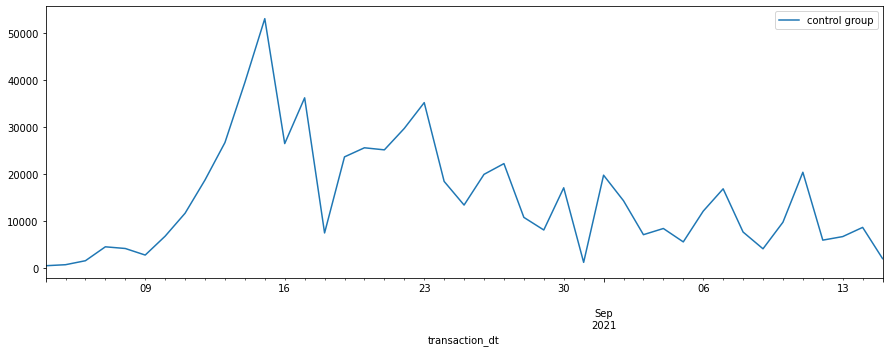

In [149]:
#test_group_clean.groupby('transaction_dt')['txn_sum'].sum().plot(figsize=(15,5), label='test group')
control_group_clean.groupby('transaction_dt')['txn_sum'].sum().plot(figsize=(15,5), label='control group')

plt.legend()
plt.show()

- average transaction number per client each day

- average 

In [177]:
test_group_clean_agg = test_group_clean.groupby('transaction_dt')[['txn_sum', 'cust_id']].agg({'txn_sum': sum, 'cust_id': 'count'})

test_group_clean_agg['unique_cust_numb'] = test_group_clean.groupby('transaction_dt')['cust_id'].nunique()

test_group_clean_agg.rename(columns={'cust_id':'trans_num'}, inplace=True)

test_group_clean_agg['trans_per_cust'] = test_group_clean_agg['trans_num']/test_group_clean_agg['unique_cust_numb']

test_group_clean_agg['sum_per_customer'] = test_group_clean_agg['txn_sum']/test_group_clean_agg['unique_cust_numb']

test_group_clean_agg['sum_per_trans'] = test_group_clean_agg['txn_sum']/test_group_clean_agg['trans_num']


In [178]:
test_group_clean_agg.head()

,txn_sum,trans_num,unique_cust_numb,trans_per_cust,sum_per_customer,sum_per_trans
transaction_dt,,,,,,
2021-08-13,126218.83,101,60,1.683333,2103.647167,1249.691386
2021-08-14,262107.66,193,126,1.531746,2080.219524,1358.070777
2021-08-15,535252.18,406,207,1.961353,2585.759324,1318.355123
2021-08-16,580692.07,374,219,1.707763,2651.561963,1552.652594
2021-08-17,605726.11,447,284,1.573944,2132.838415,1355.091969


In [179]:
test_group_clean_agg.describe()

,txn_sum,trans_num,unique_cust_numb,trans_per_cust,sum_per_customer,sum_per_trans
count,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.055116e+06,1442.968750,899.406250,1.645346,2236.145958,1348.635288
std,1.601407e+06,1116.461013,691.211599,0.468553,648.449936,224.732357
min,5.110000e+02,1.000000,1.000000,1.000000,511.000000,511.000000
25%,5.693321e+05,398.000000,216.000000,1.537145,2135.670342,1368.563968
50%,1.980846e+06,1380.500000,930.000000,1.600346,2244.037044,1410.663565
75%,3.321007e+06,2349.000000,1497.750000,1.673810,2339.805377,1442.838821
max,4.926375e+06,3399.000000,2111.000000,4.000000,4786.760000,1552.652594


##### Test Group 

Average sum of spend by customer is equal to 2236.145958

Average sum by each transaction is equal to 1348.635288

In [182]:
control_group_clean_agg = control_group_clean.groupby('transaction_dt')[['txn_sum', 'cust_id']].agg({'txn_sum': sum, 'cust_id': 'count'})

control_group_clean_agg['unique_cust_numb'] = control_group_clean.groupby('transaction_dt')['cust_id'].nunique()

control_group_clean_agg.rename(columns={'cust_id':'trans_num'}, inplace=True)

control_group_clean_agg['trans_per_cust'] = control_group_clean_agg['trans_num']/control_group_clean_agg['unique_cust_numb']

control_group_clean_agg['sum_per_customer'] = control_group_clean_agg['txn_sum']/control_group_clean_agg['unique_cust_numb']

control_group_clean_agg['sum_per_trans'] = control_group_clean_agg['txn_sum']/control_group_clean_agg['trans_num']

In [183]:
control_group_clean_agg.head()

,txn_sum,trans_num,unique_cust_numb,trans_per_cust,sum_per_customer,sum_per_trans
transaction_dt,,,,,,
2021-08-04,500.00,1,1,1.0,500.00,500.000
2021-08-05,718.60,1,1,1.0,718.60,718.600
2021-08-06,1567.15,1,1,1.0,1567.15,1567.150
2021-08-07,4528.87,2,1,2.0,4528.87,2264.435
2021-08-08,4170.00,2,2,1.0,2085.00,2085.000


In [184]:
control_group_clean_agg.describe()

,txn_sum,trans_num,unique_cust_numb,trans_per_cust,sum_per_customer,sum_per_trans
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,14909.145349,10.720930,6.581395,1.580844,2191.426648,1384.488010
std,11928.552293,8.060266,4.083839,0.581432,1016.575882,429.734178
min,500.000000,1.000000,1.000000,1.000000,500.000000,500.000000
25%,6326.190000,4.500000,3.000000,1.200000,1540.926875,1082.240647
50%,11672.910000,9.000000,6.000000,1.400000,1918.730000,1329.788667
75%,21315.550000,15.500000,9.500000,1.881944,2721.728000,1618.248750
max,53087.260000,34.000000,15.000000,4.000000,4879.270000,2266.185556


##### Control Group 

Average sum of spend by customer is equal to 2191.426648

Average sum by each transaction is equal to 1384.488010

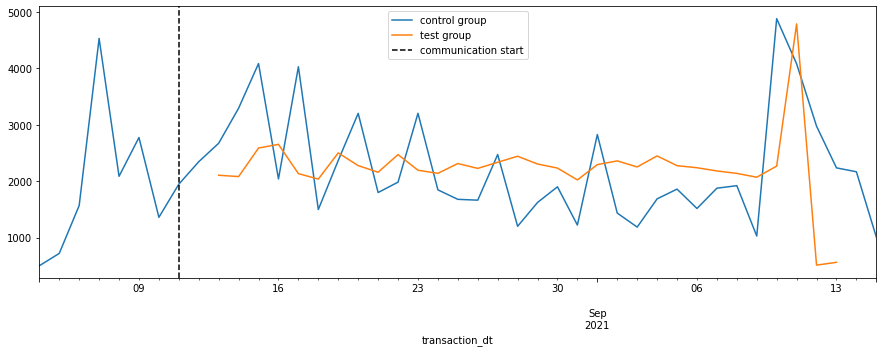

In [186]:
control_group_clean_agg['sum_per_customer'].plot(figsize=(15,5), label='control group')
test_group_clean_agg['sum_per_customer'].plot(figsize=(15,5), label='test group')
plt.axvline('2021-08-11', color='black', ls='--', label='communication start')

plt.legend()
plt.show()

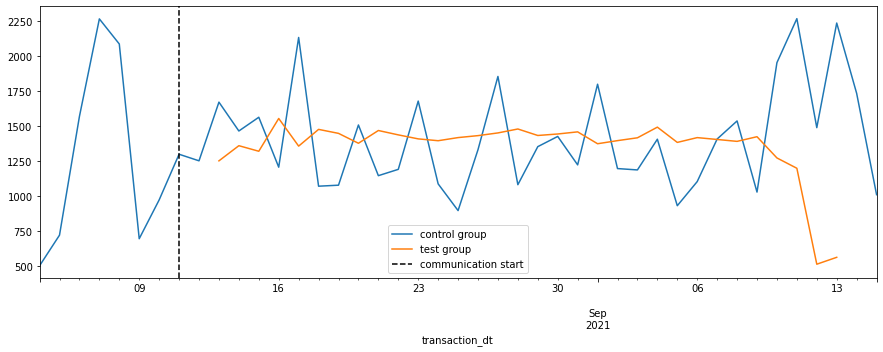

In [187]:
control_group_clean_agg['sum_per_trans'].plot(figsize=(15,5), label='control group')
test_group_clean_agg['sum_per_trans'].plot(figsize=(15,5), label='test group')
plt.axvline('2021-08-11', color='black', ls='--', label='communication start')

plt.legend()
plt.show()

In [189]:
bank_profit_per_client_control = control_group['txn_sum'].sum() * 0.01 / len(control_group['cust_id'].unique())

In [195]:
print('Bank income from customer of control group: ', round(bank_profit_per_client_control,2))

Bank income from customer of control group:  217.26


In [191]:
bank_profit_per_client_test = 0.95 * test_group['txn_sum'].sum() * 0.01 / len(test_group['cust_id'].unique()) 

In [194]:
print('Bank income from customer of test group: ', round(bank_profit_per_client_test,2))

Bank income from customer of test group:  160.86


In [193]:
twins.head()

,tg_cust_id,synthetic_control_group_cust_id
0,0002389bfab4bb945654b5b3ac7441e2c634e6062fc780...,1b5e8227cdc3e41b8159684a4ca09c6107cebc2b92630e...
1,0003e193ac559ca40490de7e059116752e4e621366ba2c...,b3433e2f2b7eb77ffb9806e7ad9ebbeb2d119d2bdf1682...
2,000bcd2b9a9baba21d919252a67b4a72d73ee6b666aac3...,9e5ed7736baad40b61b4c86534ddf6d608da8f718c8b6b...
3,000f349449114fbb293ba4cb4f8efb48adaebd7aade67b...,125eeca73effdac0d44004de3ee7720556d2fe3a30f58f...
4,0011c3bb53e4f73534edf3e922abae44ccc1333ba9a7b3...,bb08bea34c22a12e8c8209b84717fb8906b2c978316933...


#### Outcomes

As we can see from the analysis above, customers from test group have not active behavior after communication compaign. 

KPIs for communication funnel shows the low conversion rate (1.42 %) and click rate (3.18 %).

Test group:
- Average sum of spend by customer is equal to 2236.145958

- Average sum by each transaction is equal to 1348.635288

- Bank income from customer of test group:  160.86

Control group:
- Average sum of spend by customer is equal to 2191.426648

- Average sum by each transaction is equal to 1384.488010

- Bank income from customer of control group:  217.26

We can't say, that this compaign was successfull